In [1]:
# import keras from tensorflow.keras

import numpy as np

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
# 事前にシャッフルされた MNIST のデータ
# 各データ点は 28 x 28 次元の [0, 255] を取る整数)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = X_train.shape[1:]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(K.image_data_format())

channels_last


In [3]:
n_classes = np.unique(y_test).size
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [4]:
!curl "https://i.stack.imgur.com/49cdt.png" -o "images/convolution_2d.png"
!curl "https://i.stack.imgur.com/IvDQP.png" -o "images/convolution_3d.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14804  100 14804    0     0  69378      0 --:--:-- --:--:-- --:--:-- 69502
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16564  100 16564    0     0  99144      0 --:--:-- --:--:-- --:--:-- 99783


## ConvXD

* `X`の部分には 1,2,3 が入るが，これは出力の次元を表している．

![２次元](./images/convolution_2d.png)
![２次元](./images/convolution_3d.png)

#### パラメータ

`filters`
* 畳み込みによって作られるレイヤーの数
* $2^n$ が多いらしい

`kernel_size`
* 窓関数のサイズ
* $N=2$ のときは，kernelは2次元のタプル/リスト `(k, k)` で表される．また，正方形のカネールの場合は1辺の長さだけ指定しても良い．
* $N=3$ のときは，kernelは3次元のタプル/リスト `(k, k, d)` で表される．

`activation`
* 生成されたレイヤの各ピクセルにかけられる活性化関数

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

In [6]:
from keras.optimizers import Adadelta

model.compile(loss='categorical_crossentropy',
             optimizer=Adadelta(),
             metrics=['accuracy'])

In [7]:
batch_size = 128
epochs = 20

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 10s 233us/step - loss: 0.3212 - acc: 0.9023 - val_loss: 0.0836 - val_acc: 0.9751
Epoch 2/20
42000/42000 [==============================] - 4s 88us/step - loss: 0.1033 - acc: 0.9694 - val_loss: 0.0596 - val_acc: 0.9822
Epoch 3/20
42000/42000 [==============================] - 4s 89us/step - loss: 0.0757 - acc: 0.9774 - val_loss: 0.0578 - val_acc: 0.9831
Epoch 4/20
42000/42000 [==============================] - 4s 90us/step - loss: 0.0597 - acc: 0.9819 - val_loss: 0.0544 - val_acc: 0.9843
Epoch 5/20
42000/42000 [==============================] - 4s 90us/step - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0516 - val_acc: 0.9852
Epoch 6/20
42000/42000 [==============================] - 4s 92us/step - loss: 0.0469 - acc: 0.9863 - val_loss: 0.0444 - val_acc: 0.9866
Epoch 7/20
42000/42000 [==============================] - 4s 94us/step - loss: 0.0415 - acc: 0.9871 - val_loss: 0.0427 - val_a

In [8]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 93us/step


In [9]:
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Test loss: 0.03446844833623063
Test accuracy: 99.03


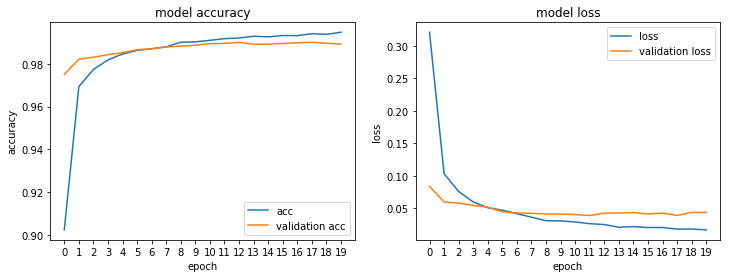

In [27]:
def plot_history(history):
    fig = plt.figure(figsize=(12,4))
    
    ax = fig.add_subplot(1,2,1)
    ax.plot(history.history['acc'], label='acc')
    ax.plot(history.history['val_acc'], label='validation acc')
    ax.set_title('model accuracy')
    ax.set_xlabel('epoch')
    ax.set_xticks(np.arange(0, epochs))
    ax.set_ylabel('accuracy')
    ax.legend()

    ax = fig.add_subplot(1,2,2)
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='validation loss')
    ax.set_title('model loss')
    ax.set_xlabel('epoch')
    ax.set_xticks(np.arange(0, epochs))
    ax.set_ylabel('loss')
    ax.legend()
    plt.show()

plot_history(history)